# EDA Project (CRICKET)

## Data Cleaning & Preprocessing

### 1. Identify and handle any missing values in the dataset

In [82]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cricket_data.csv")

# Clean special characters in score columns before checking missing values
df['Highest_Score'] = df['Highest_Score'].astype(str).str.replace('*', '', regex=False)
df['Best_Bowling_Match'] = df['Best_Bowling_Match'].astype(str).str.replace('*', '', regex=False)

# Convert necessary columns to numeric for accurate missing value detection
numeric_columns = [
    'Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate',
    'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

# Convert to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now check for missing values again
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Year                    42
Matches_Batted          41
Not_Outs                41
Runs_Scored             41
Highest_Score           41
Batting_Average         41
Balls_Faced             41
Batting_Strike_Rate     41
Centuries               41
Half_Centuries          41
Fours                   41
Sixes                   41
Catches_Taken           41
Stumpings               41
Matches_Bowled          42
Balls_Bowled            42
Runs_Conceded           42
Wickets_Taken           42
Best_Bowling_Match     753
Bowling_Average         42
Economy_Rate            42
Bowling_Strike_Rate     42
Four_Wicket_Hauls       42
Five_Wicket_Hauls       42
dtype: int64


In [84]:
df['Year'].fillna(df['Year'].median(), inplace=True)  #handling missing values

### 2. Are there any inconsistencies in the dataset (e.g., mismatched data types, outliers)?

In [85]:
# View original data types before conversion
print("Original Data Types:\n", df.dtypes)

# Re-check after cleaning
print("Sample Cleaned Highest Score Values:\n", df['Highest_Score'].unique()[:10])

Original Data Types:
 Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match     float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object
Sample Cleaned Highest Score Values:
 [ 46.  92.  99. 101.  72.  87.   0.  32.  50.  18.]


### 3. Convert all numerical columns to appropriate data types for analysis.


In [86]:
# Define all numeric columns
numeric_columns = [
    'Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate',
    'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

# Convert all to numeric using coercion
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display updated data types
print("Converted Data Types:\n", df.dtypes)

Converted Data Types:
 Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match     float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object


### 4. How would you handle data if there are duplicate records?


In [88]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Total Duplicate Rows: 0


### 5. Normalize or standardize relevant numerical features for better comparison.

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Copy for normalization
df_normalized = df.copy()

# Select features to normalize
normalize_cols = [
    'Runs_Scored', 'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate',
    'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate'
]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_normalized[normalize_cols] = scaler.fit_transform(df[normalize_cols])

# Display sample of normalized values
print("Normalized Sample:\n", df_normalized[normalize_cols].head())

Normalized Sample:
    Runs_Scored  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0     0.062693         0.301980     0.079688             0.299025   
1     0.606372         0.417228     0.625000             0.368750   
2     0.378212         0.260297     0.454688             0.316150   
3     0.652621         0.449010     0.728125             0.340650   
4     0.209661         0.504950     0.264063             0.301775   

   Bowling_Average  Economy_Rate  Bowling_Strike_Rate  
0              0.0           0.0                  0.0  
1              0.0           0.0                  0.0  
2              0.0           0.0                  0.0  
3              0.0           0.0                  0.0  
4              0.0           0.0                  0.0  


## Exploratory Data Analysis (EDA)

### 6. What is the distribution of the Batting Average for all players?

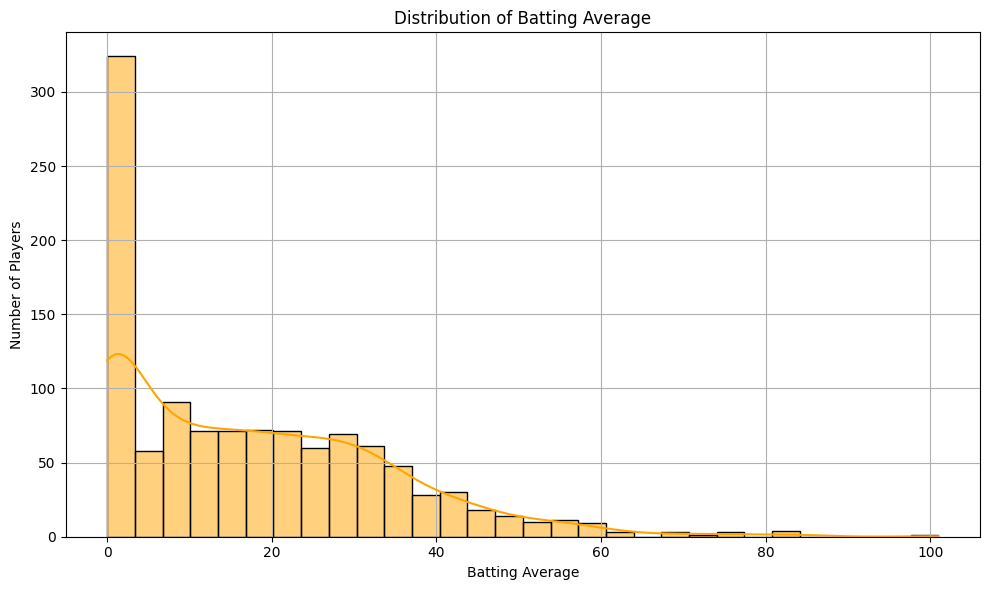

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Batting_Average'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Number of Players')
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Which player has the highest Batting Strike Rate across all seasons?


In [90]:
# Filter non-null strike rates
top_strike = df[df['Batting_Strike_Rate'].notnull()]
top_strike_player = top_strike.loc[top_strike['Batting_Strike_Rate'].idxmax(), ['Player_Name', 'Batting_Strike_Rate']]

print("Player with Highest Batting Strike Rate:")
print(top_strike_player)

Player with Highest Batting Strike Rate:
Player_Name            Prerak Mankad
Batting_Strike_Rate            400.0
Name: 541, dtype: object


### 8. What is the trend in Runs Scored for each player over different years?


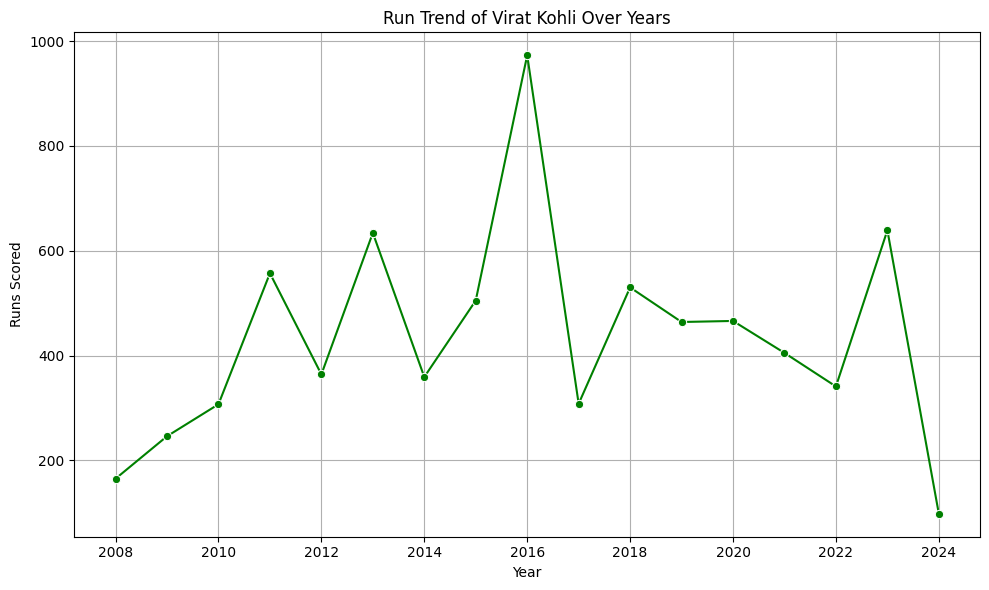

In [91]:
# Example trend for a player (e.g., Virat Kohli)
player_trend = df[df['Player_Name'] == 'Virat Kohli']
plt.figure(figsize=(10, 6))
sns.lineplot(data=player_trend, x='Year', y='Runs_Scored', marker='o', color='green')
plt.title('Run Trend of Virat Kohli Over Years')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()

### 9. Identify the top 3 players with the most Centuries.


In [92]:
top_centuries = df.groupby('Player_Name')['Centuries'].sum().sort_values(ascending=False).head(3)
print("Top 3 Players with Most Centuries:\n", top_centuries)

Top 3 Players with Most Centuries:
 Player_Name
Virat Kohli    7.0
Jos Buttler    5.0
KL Rahul       4.0
Name: Centuries, dtype: float64


### 10. Which player has the highest Bowling Economy Rate?

In [93]:
# Filter players with valid economy rate and sort descending
worst_economy = df[df['Economy_Rate'].notnull()]
worst_player = worst_economy.loc[worst_economy['Economy_Rate'].idxmax(), ['Player_Name', 'Economy_Rate']]

print("Player with Highest Economy Rate:\n", worst_player)

Player with Highest Economy Rate:
 Player_Name     Yashasvi Jaiswal
Economy_Rate                36.0
Name: 831, dtype: object


## Feature Engineering

### 11. Create a new feature called "Boundary Percentage", which calculates the percentage of runs scored from fours and sixes.

In [94]:
# Handle division by zero
df['Boundary_Percentage'] = ((4 * df['Fours'] + 6 * df['Sixes']) / df['Runs_Scored']) * 100
df['Boundary_Percentage'] = df['Boundary_Percentage'].fillna(0)

# View sample
print(df[['Player_Name', 'Fours', 'Sixes', 'Runs_Scored', 'Boundary_Percentage']].head())

       Player_Name  Fours  Sixes  Runs_Scored  Boundary_Percentage
0  Ruturaj Gaikwad    8.0    1.0         61.0            62.295082
1  Ruturaj Gaikwad   46.0   30.0        590.0            61.694915
2  Ruturaj Gaikwad   33.0   14.0        368.0            58.695652
3  Ruturaj Gaikwad   64.0   23.0        635.0            62.047244
4  Ruturaj Gaikwad   16.0    6.0        204.0            49.019608


### 12. Create a feature called "Batting Impact Score" based on runs, strike rate, and average.

In [95]:
df['Batting_Impact_Score'] = (
    df['Runs_Scored'] * 0.5 +
    df['Batting_Strike_Rate'] * 0.3 +
    df['Batting_Average'] * 0.2
)

# Show top 5
print(df[['Player_Name', 'Batting_Impact_Score']].sort_values(by='Batting_Impact_Score', ascending=False).head())

        Player_Name  Batting_Impact_Score
946     Virat Kohli               548.325
223    Shubman Gill               504.206
816     Jos Buttler               487.721
131    David Warner               481.540
924  Faf du Plessis               422.334


### 13. Generate a metric to evaluate a player's all-round performance considering both batting and bowling stats.

In [96]:
df['All_Round_Score'] = (
    df['Batting_Impact_Score'] +
    (df['Wickets_Taken'] * 20) -
    (df['Bowling_Average'].fillna(0) * 2)
)

# Show top all-rounders
print(df[['Player_Name', 'All_Round_Score']].sort_values(by='All_Round_Score', ascending=False).head())

        Player_Name  All_Round_Score
793   Harshal Patel          682.248
341     Rashid Khan          635.621
776   Kagiso Rabada          628.564
656  Jasprit Bumrah          562.578
946     Virat Kohli          548.325


### 14. Categorize players into Aggressive, Balanced, and Defensive based on their strike rate.


In [97]:
def classify_type(sr):
    if pd.isnull(sr):
        return 'Unknown'
    elif sr > 140:
        return 'Aggressive'
    elif sr >= 100:
        return 'Balanced'
    else:
        return 'Defensive'

df['Player_Type'] = df['Batting_Strike_Rate'].apply(classify_type)

# Count of types
print(df['Player_Type'].value_counts())

Player_Type
Balanced      462
Defensive     391
Aggressive    278
Unknown        41
Name: count, dtype: int64


### 15. Compute the year-over-year growth in performance metrics for each player.

In [98]:
# Sort by player and year
df_sorted = df.sort_values(by=['Player_Name', 'Year'])

# Calculate YoY growth for Runs
df_sorted['Run_Growth_%'] = df_sorted.groupby('Player_Name')['Runs_Scored'].pct_change() * 100

# Show sample
print(df_sorted[['Player_Name', 'Year', 'Runs_Scored', 'Run_Growth_%']].head(10))

          Player_Name    Year  Runs_Scored  Run_Growth_%
1050      Abdul Samad  2020.0        111.0           NaN
1049      Abdul Samad  2021.0        111.0      0.000000
1048      Abdul Samad  2022.0          4.0    -96.396396
1047      Abdul Samad  2023.0        169.0   4125.000000
1046      Abdul Samad  2024.0         15.0    -91.124260
273   Abhinav Manohar  2022.0        108.0           NaN
272   Abhinav Manohar  2023.0        114.0      5.555556
1096  Abhishek Sharma  2018.0         63.0           NaN
1095  Abhishek Sharma  2019.0          9.0    -85.714286
1094  Abhishek Sharma  2020.0         71.0    688.888889


## Visualization & Insights

### 16. Create a bar chart to show the Runs Scored vs. Balls Faced for all players.


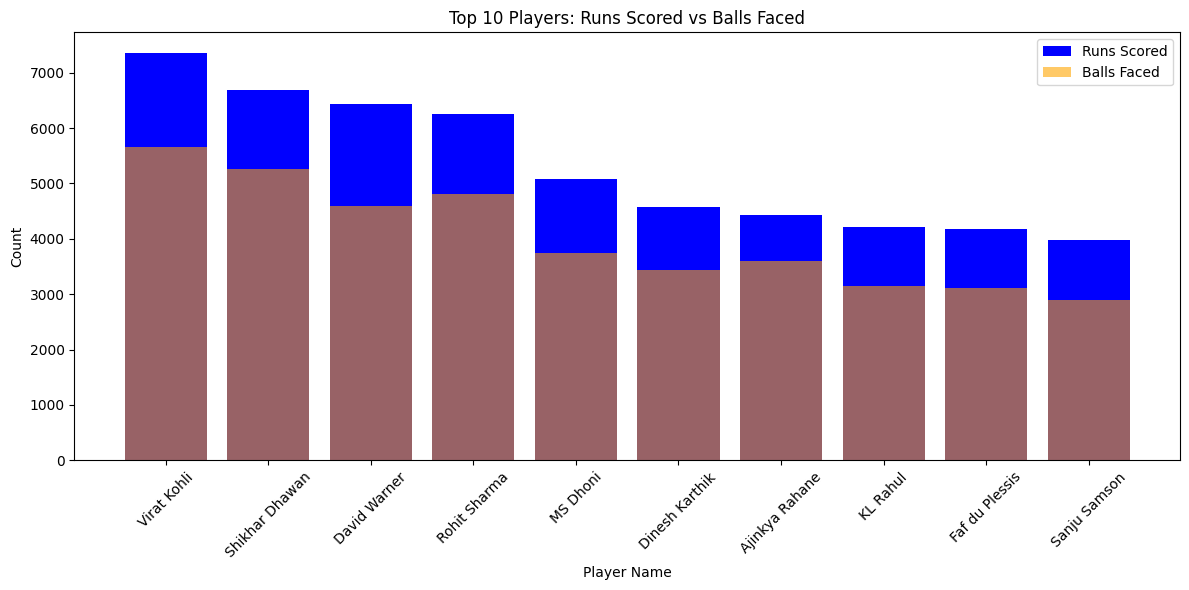

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Group and sum data for each player
top_players = df.groupby('Player_Name')[['Runs_Scored', 'Balls_Faced']].sum().reset_index()

# Take top 10 players based on Runs Scored
top10 = top_players.sort_values(by='Runs_Scored', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top10['Player_Name'], top10['Runs_Scored'], label='Runs Scored', color='blue')
plt.bar(top10['Player_Name'], top10['Balls_Faced'], label='Balls Faced', color='orange', alpha=0.6)

plt.title('Top 10 Players: Runs Scored vs Balls Faced')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



### 17. Generate a heatmap showing the correlation between different numerical features.


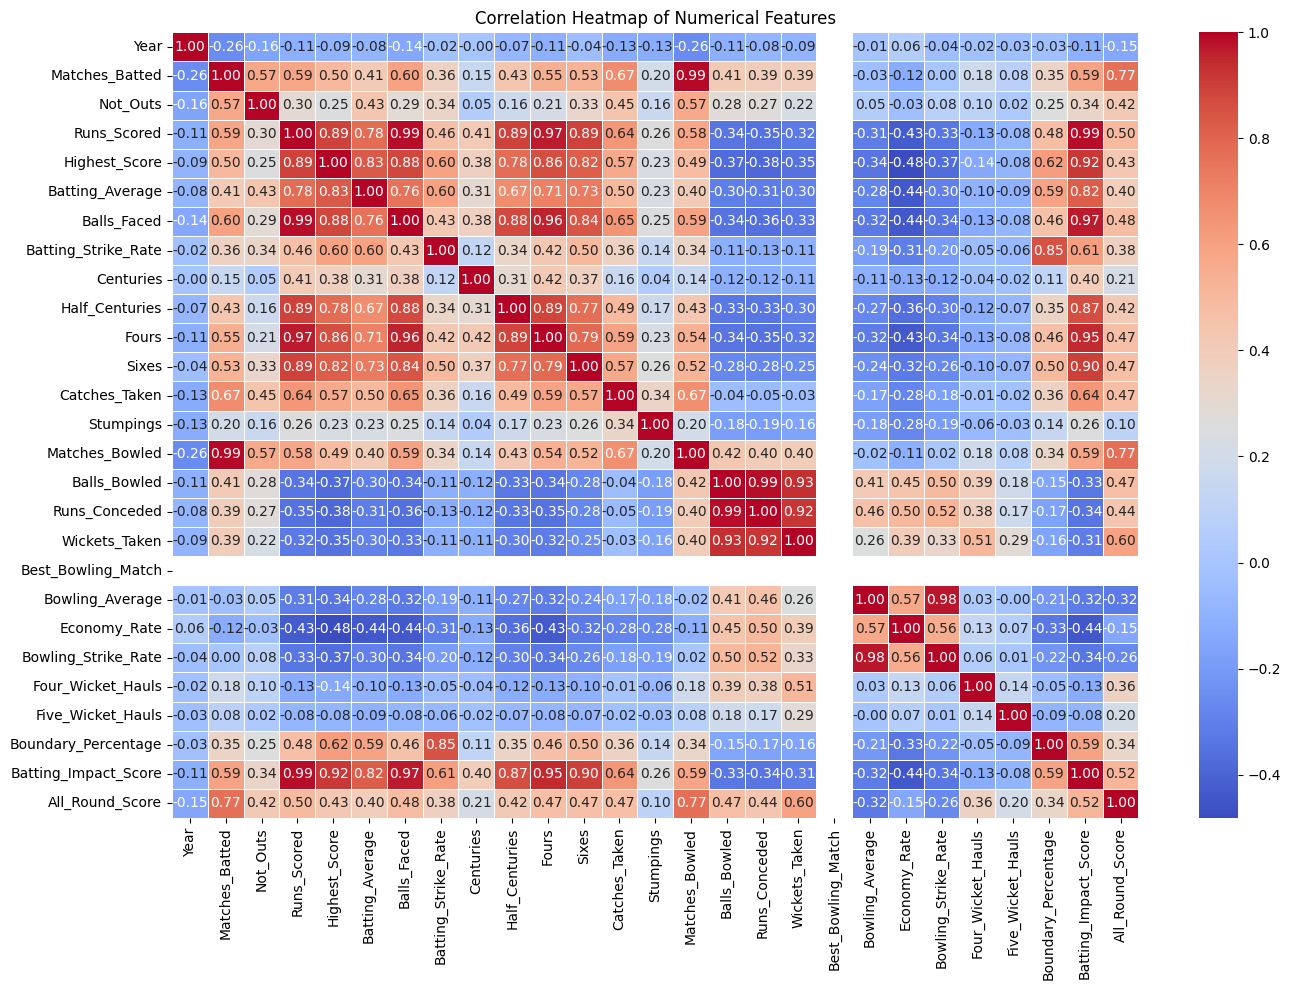

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


### 18. Plot a trend line showing the performance of a single player over multiple years.

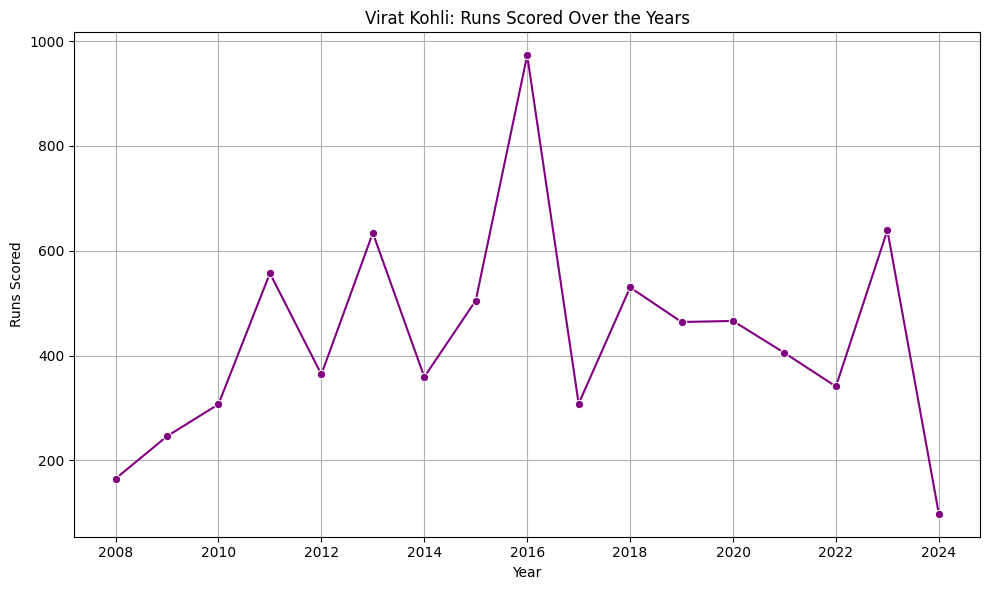

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Virat Kohli's records and sort by year
kohli = df[df['Player_Name'] == 'Virat Kohli'].sort_values(by='Year')

# Plot the trend line
plt.figure(figsize=(10, 6))
sns.lineplot(data=kohli, x='Year', y='Runs_Scored', marker='o', color='purple')
plt.title('Virat Kohli: Runs Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()


### 19. Create a pie chart for the distribution of centuries and half-centuries across all players.


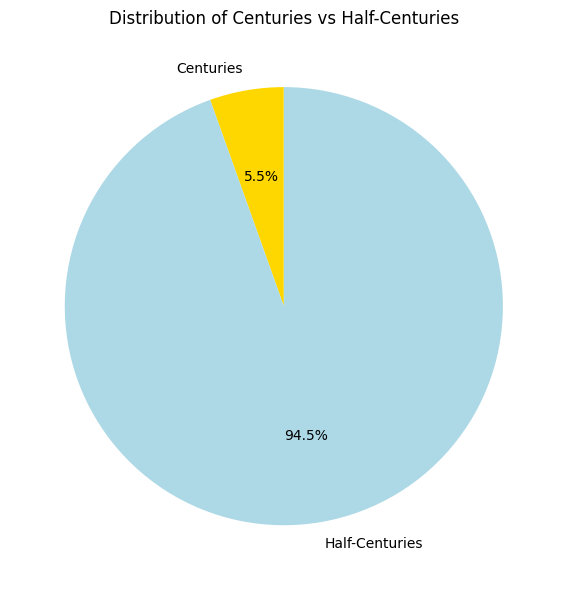

In [102]:
import matplotlib.pyplot as plt

# Calculate total across all players
total_centuries = df['Centuries'].sum()
total_half_centuries = df['Half_Centuries'].sum()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([total_centuries, total_half_centuries],
        labels=['Centuries', 'Half-Centuries'],
        autopct='%1.1f%%',
        colors=['gold', 'lightblue'],
        startangle=90)
plt.title('Distribution of Centuries vs Half-Centuries')
plt.tight_layout()
plt.show()


### 20. Develop a visualization to compare Bowling Average vs. Bowling Strike Rate.


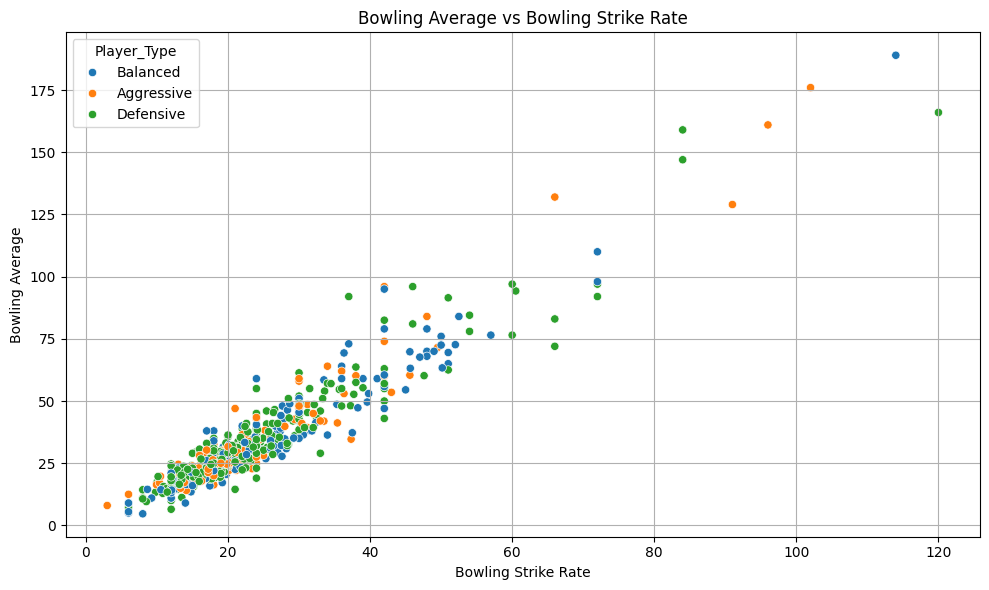

In [103]:
# Filter players with valid bowling average and strike rate
bowlers = df[(df['Bowling_Average'] > 0) & (df['Bowling_Strike_Rate'] > 0)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowlers, x='Bowling_Strike_Rate', y='Bowling_Average', hue='Player_Type')
plt.title('Bowling Average vs Bowling Strike Rate')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Bowling Average')
plt.grid(True)
plt.tight_layout()
plt.show()

## Python-Based Queries (If the data is stored in a relational database)

### 21. Write a Python query to get the top 5 players with the highest Batting Average

In [104]:
top_avg = df[df['Batting_Average'].notnull()] \
            .groupby('Player_Name', as_index=False)['Batting_Average'].max() \
            .sort_values(by='Batting_Average', ascending=False).head(5)

print("Top 5 Players with Highest Batting Average:")
print(top_avg)

Top 5 Players with Highest Batting Average:
       Player_Name  Batting_Average
36    Deepak Hooda           101.00
85   Manish Pandey            84.00
82        MS Dhoni            83.20
183     Tom Curran            83.00
194    Virat Kohli            81.08


### 22. Write a Python query to find out which player has played the most matches.


In [105]:
df['Total_Matches'] = df['Matches_Batted'].fillna(0) + df['Matches_Bowled'].fillna(0)

most_matches = df.groupby('Player_Name', as_index=False)['Total_Matches'].sum() \
                 .sort_values(by='Total_Matches', ascending=False).head(1)

print("Player Who Played the Most Matches:")
print(most_matches)

Player Who Played the Most Matches:
   Player_Name  Total_Matches
98    MS Dhoni          504.0


### 23. Retrieve all players who have scored more than 500 runs in a season.


In [106]:
high_scorers = df[df['Runs_Scored'] > 500][['Player_Name', 'Year', 'Runs_Scored']] \
                .sort_values(by='Runs_Scored', ascending=False)

print("Players who scored more than 500 runs in a season:")
print(high_scorers)

Players who scored more than 500 runs in a season:
          Player_Name    Year  Runs_Scored
946       Virat Kohli  2016.0        973.0
223      Shubman Gill  2023.0        890.0
816       Jos Buttler  2022.0        863.0
131      David Warner  2016.0        848.0
268   Kane Williamson  2018.0        735.0
924    Faf du Plessis  2023.0        730.0
129      David Warner  2019.0        692.0
121      Rishabh Pant  2018.0        684.0
5        Devon Conway  2023.0        672.0
471          KL Rahul  2020.0        670.0
473          KL Rahul  2018.0        659.0
130      David Warner  2017.0        641.0
939       Virat Kohli  2023.0        639.0
3     Ruturaj Gaikwad  2021.0        635.0
949       Virat Kohli  2013.0        634.0
926    Faf du Plessis  2021.0        633.0
470          KL Rahul  2021.0        626.0
830  Yashasvi Jaiswal  2023.0        625.0
698    Shikhar Dhawan  2020.0        618.0
469          KL Rahul  2022.0        616.0
600  Suryakumar Yadav  2023.0        605.0
472

### 24. Identify players who have taken at least one five-wicket haul.

In [107]:
five_wicket = df[df['Five_Wicket_Hauls'] >= 1][['Player_Name', 'Year', 'Five_Wicket_Hauls']]

print("Players with 5-wicket hauls:")
print(five_wicket)

Players with 5-wicket hauls:
              Player_Name    Year  Five_Wicket_Hauls
55        Ravindra Jadeja  2012.0                1.0
208         Ishant Sharma  2011.0                1.0
350          Mohit Sharma  2023.0                1.0
416         Andre Russell  2021.0                1.0
452          Sunil Narine  2012.0                1.0
459   Varun Chakaravarthy  2020.0                1.0
575           Amit Mishra  2008.0                1.0
654        Jasprit Bumrah  2022.0                1.0
682         Akash Madhwal  2023.0                1.0
769        Arshdeep Singh  2021.0                1.0
793         Harshal Patel  2021.0                1.0
909      Yuzvendra Chahal  2022.0                1.0
920            Adam Zampa  2016.0                1.0
1021       Alzarri Joseph  2019.0                1.0
1110    Wanindu Hasaranga  2022.0                1.0
1127    Bhuvneshwar Kumar  2023.0                1.0
1133    Bhuvneshwar Kumar  2017.0                1.0
1148       Jaydev

### 25. Write a query to calculate the total number of boundaries hit by each player


In [108]:
df['Total_Boundaries'] = df['Fours'] + df['Sixes']

boundaries = df.groupby('Player_Name', as_index=False)['Total_Boundaries'].sum() \
               .sort_values(by='Total_Boundaries', ascending=False)

print("Total Boundaries Hit by Each Player:")
print(boundaries.head(10))  # Top 10

Total Boundaries Hit by Each Player:
        Player_Name  Total_Boundaries
193  Shikhar Dhawan             908.0
233     Virat Kohli             891.0
41     David Warner             877.0
172    Rohit Sharma             819.0
50   Dinesh Karthik             588.0
98         MS Dhoni             588.0
8    Ajinkya Rahane             553.0
79         KL Rahul             529.0
53   Faf du Plessis             527.0
181    Sanju Samson             495.0
